https://machinelearningmastery.com/text-generation-lstm-recurrent-neural-networks-python-keras/

In [4]:
! pip install -q kaggle
! pip install wordcloud


In [5]:
from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"paigemb","key":"bd593be015158ad3b979e7680c23f5da"}'}

In [6]:
! mkdir ~/.kaggle

! cp kaggle.json ~/.kaggle/

In [7]:
! chmod 600 ~/.kaggle/kaggle.json

In [8]:
 ! kaggle datasets list

ref                                                       title                                               size  lastUpdated          downloadCount  
--------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  
terenceshin/covid19s-impact-on-airport-traffic            COVID-19's Impact on Airport Traffic               106KB  2020-10-19 12:40:17            780  
sootersaalu/amazon-top-50-bestselling-books-2009-2019     Amazon Top 50 Bestselling Books 2009 - 2019         15KB  2020-10-13 09:39:21            813  
thomaskonstantin/highly-rated-children-books-and-stories  Highly Rated Children Books And Stories            106KB  2020-10-24 12:09:59            205  
tunguz/euro-parliament-proceedings-1996-2011              Euro Parliament Proceedings 1996 - 2011              1GB  2020-10-26 17:48:29             10  
rishidamarla/judicial-expenditures-across-all-50-states   Judicial Expenditures ac

In [9]:
!kaggle datasets download -d charlesaverill/gothic-literature

  0% 0.00/1.61M [00:00<?, ?B/s]
100% 1.61M/1.61M [00:00<00:00, 54.2MB/s]


In [10]:
!unzip -q gothic-literature.zip -d .


In [11]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd 


In [23]:

dorian=open ("doriangray.txt").read()

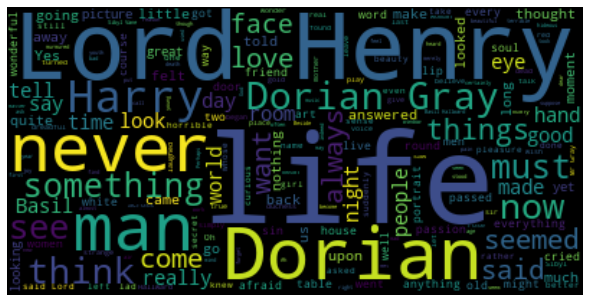

In [36]:

cloud = WordCloud(stopwords=stopwords).generate(dorian)
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(cloud, interpolation="bilinear")
stopwords = set(STOPWORDS)
stopwords.update(["will", "thing", "one","know"])
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()


In [25]:
castle=open ("castleofotranto.txt").read()

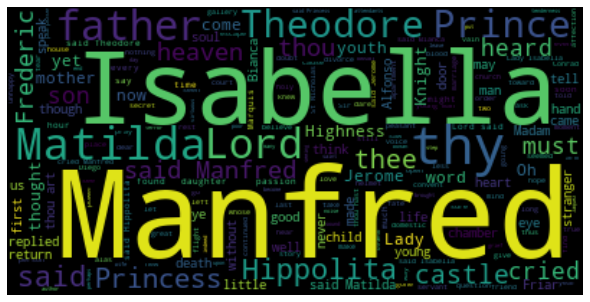

In [37]:
cloud = WordCloud(stopwords=stopwords).generate(castle)
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(cloud, interpolation="bilinear")
stopwords = set(STOPWORDS)
stopwords.update(["thy", "said", "thee","will"])
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

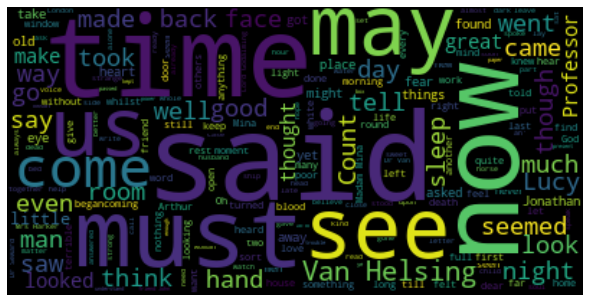

In [39]:
dracula=open ("dracula.txt").read()
cloud = WordCloud(stopwords=stopwords).generate(dracula)
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(cloud, interpolation="bilinear")
stopwords = set(STOPWORDS)
stopwords.update(["will", "thing", "one","know","now"])
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

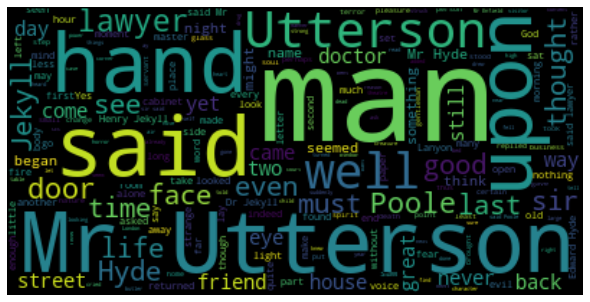

In [41]:
drj=open ("drjekyllmrhyde.txt").read()
cloud = WordCloud(stopwords=stopwords).generate(drj)
stopwords = set(STOPWORDS)
stopwords.update(["will", "thing", "one","man"])
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(cloud, interpolation="bilinear")
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

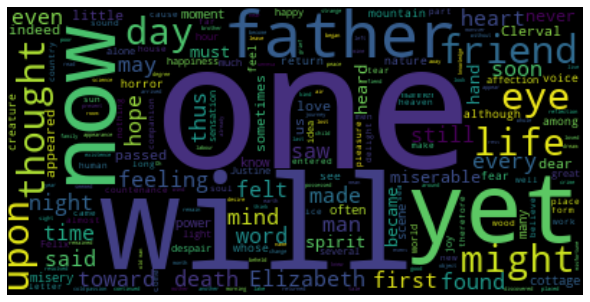

In [29]:
frankenstein=open ("frankenstein.txt").read()
cloud = WordCloud().generate(frankenstein)
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(cloud, interpolation="bilinear")
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

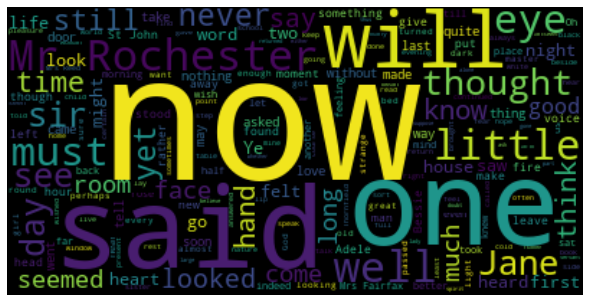

In [30]:
janeeyre=open ("janeeyre.txt").read()
cloud = WordCloud().generate(janeeyre)
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(cloud, interpolation="bilinear")
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

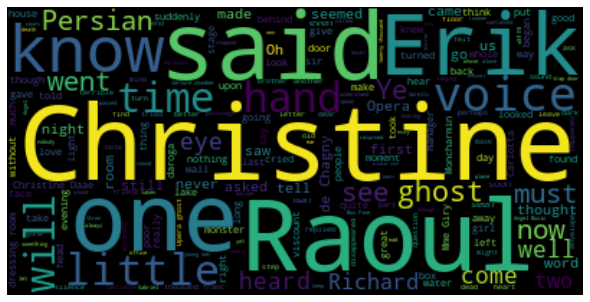

In [31]:
phantom=open ("phantomoftheopera.txt").read()
cloud = WordCloud().generate(phantom)
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(cloud, interpolation="bilinear")
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

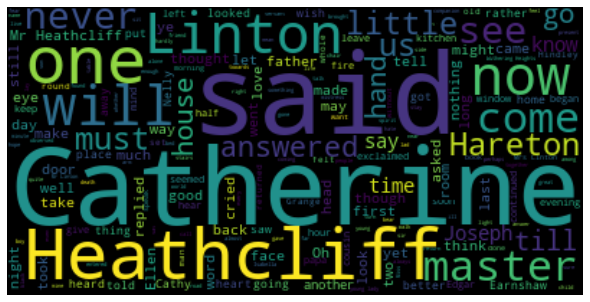

In [32]:
wuth=open ("wutheringheights.txt").read()
cloud = WordCloud().generate(wuth)
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(cloud, interpolation="bilinear")
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [12]:

import numpy
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import LSTM
from keras.callbacks import ModelCheckpoint
from keras.utils import np_utils

In [15]:
filename = "doriangray.txt"
raw_text = open(filename, 'r', encoding='utf-8').read()
raw_text = raw_text.lower()

In [16]:
# create mapping of unique chars to integers
chars = sorted(list(set(raw_text)))
char_to_int = dict((c, i) for i, c in enumerate(chars))

In [17]:
n_chars = len(raw_text)
n_vocab = len(chars)
print ("Total Characters: ", n_chars)
print ("Total Vocab: ", n_vocab)

Total Characters:  26975
Total Vocab:  39


In [18]:

# prepare the dataset of input to output pairs encoded as integers
seq_length = 100
dataX = []
dataY = []
for i in range(0, n_chars - seq_length, 1):
	seq_in = raw_text[i:i + seq_length]
	seq_out = raw_text[i + seq_length]
	dataX.append([char_to_int[char] for char in seq_in])
	dataY.append(char_to_int[seq_out])
n_patterns = len(dataX)
print ("Total Patterns: ", n_patterns)

Total Patterns:  26875


In [19]:

# reshape X to be [samples, time steps, features]
X = numpy.reshape(dataX, (n_patterns, seq_length, 1))
# normalize
X = X / float(n_vocab)
# one hot encode the output variable
y = np_utils.to_categorical(dataY)

In [20]:
# define the LSTM model
model = Sequential()
model.add(LSTM(256, input_shape=(X.shape[1], X.shape[2])))
model.add(Dropout(0.2))
model.add(Dense(y.shape[1], activation='softmax'))
optimizer = Adam(lr=0.01) 
model.compile(loss='categorical_crossentropy', optimizer=optimizer)

In [21]:
# define the checkpoint
filepath="weights-improvement-{epoch:02d}-{loss:.4f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='loss', verbose=1, save_best_only=True, mode='min')
callbacks_list = [checkpoint]

In [22]:
model.fit(X, y, epochs=20, batch_size=200, callbacks=callbacks_list)


Epoch 1/20
133/135 [============================>.] - ETA: 0s - loss: 3.0469
Epoch 00001: loss improved from inf to 3.04566, saving model to weights-improvement-01-3.0457.hdf5
135/135 [==============================] - 3s 20ms/step - loss: 3.0457
Epoch 2/20
133/135 [============================>.] - ETA: 0s - loss: 2.9454
Epoch 00002: loss improved from 3.04566 to 2.94427, saving model to weights-improvement-02-2.9443.hdf5
135/135 [==============================] - 3s 19ms/step - loss: 2.9443
Epoch 3/20
133/135 [============================>.] - ETA: 0s - loss: 2.8477
Epoch 00003: loss improved from 2.94427 to 2.84812, saving model to weights-improvement-03-2.8481.hdf5
135/135 [==============================] - 3s 19ms/step - loss: 2.8481
Epoch 4/20
133/135 [============================>.] - ETA: 0s - loss: 2.8003
Epoch 00004: loss improved from 2.84812 to 2.80033, saving model to weights-improvement-04-2.8003.hdf5
135/135 [==============================] - 3s 19ms/step - loss: 2.8003


In [ ]:
import matplotlib.pyplot as plt
# Use FiveThirtyEight style theme
plt.style.use('fivethirtyeight')
# Moving Average function used for the dotted line
def movingaverage(interval, window_size):
    window = np.ones(int(window_size))/float(window_size)
    return np.convolve(interval, window, 'same')
length = sum([len(hp[book]) for book in hp])
x = np.linspace(0, length - 1, num=length)
y = [hp[book][chapter][2]['compound'] for book in hp for chapter in hp[book]]
plt.figure(figsize=(15, 10))
for book in book_indices:
    plt.plot(x[book_indices[book][0]: book_indices[book][1]],
             y[book_indices[book][0]: book_indices[book][1]],
             label=book)
plt.plot(movingaverage(y, 10), color='k', linewidth=3, linestyle=':', label = 'Moving Average')
plt.axhline(y=0, xmin=0, xmax=length, alpha=.25, color='r', linestyle='--', linewidth=3)
plt.legend(loc='best', fontsize=15)
plt.title('Emotional Sentiment of The Picture of Dorian Gray', fontsize=20)
plt.xlabel('Chapter', fontsize=15)
plt.ylabel('Average Sentiment', fontsize=15)
plt.show()

In [14]:
from urllib.request import urlopen

filename = "doriangray.txt"
raw_text = open(filename, 'r', encoding='utf-8').read()
#print(huck_fin_text)
dg_chapters = raw_text.split('CHAPTER ')[1:]

import re
dg_book = open("doriangray.txt", "r") 
dg_book = str(dg_book.read()) 
chapters = re.split("Chapter ", dg_book, flags = re.IGNORECASE) #
chapters.pop(0) # Removes the first item in list as this is ""
for i in range(1, len(chapters)+1): #Loops for the number of chapters in the book, starting at chapter 1
    writeBook = open("{}.txt".format(i), "w+") #Opens a book with the name of i, if it does not exist, it creates one
    writeBook.write(chapters[i-1]) #Overwrites what is written in the book with the same chapter in the list
    writeBook.close() #Finally, it closes the text file

In [58]:

!pip install nltk


In [59]:
import nltk


In [65]:
import nltk
from nltk.tokenize import sent_tokenize
nltk.download('punkt')


text1 = open('1.txt').read()

sent_tokenize(text1)
textList = sent_tokenize(text1)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
!pip install vaderSentiment


In [91]:

# import SentimentIntensityAnalyzer class 
# from vaderSentiment.vaderSentiment module. 
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer 

def lookAtParagraph(textList):
  sid_obj = SentimentIntensityAnalyzer() 
  pos = 0
  neg = 0
  neut = 0

  for x in textList:
  
    sentiment_dict = sid_obj.polarity_scores(x)
    #print("Overall sentiment dictionary is : ", sentiment_dict) 
    #print("sentence was rated as ", sentiment_dict['neg']*100, "% Negative") 
    #print("sentence was rated as ", sentiment_dict['neu']*100, "% Neutral") 
    #print("sentence was rated as ", sentiment_dict['pos']*100, "% Positive") 
    
    #print("Sentence Overall Rated As", end = " ") 
    if sentiment_dict['compound'] >= 0.05 : 
      #print("Positive") 
      pos+=1
    elif sentiment_dict['compound'] <= - 0.05 : 
      #print("Negative") 
      neg+=1
    else :
      #print("Neutral") 
      neut+=1
  import matplotlib.pyplot as plt
  Sentiment = ['Positive', 'Negative', 'Neutral']
  Value = [pos,neg,neut]
  plt.bar(Sentiment,Value)
  plt.title('Sentiment Analyis Per Sentence')
  plt.xlabel('Sentiment')
  plt.ylabel('Frequency Per Sentence')
  plt.show()

      
    
      
   
  

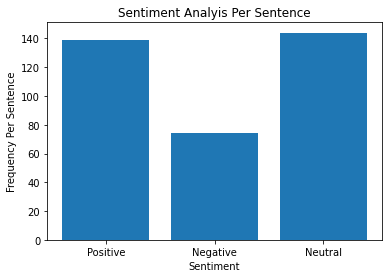

In [93]:
text1 = open('1.txt').read()
sent_tokenize(text2)
textList = sent_tokenize(text1)
lookAtParagraph(textList)

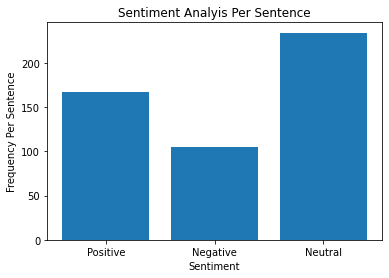

In [92]:

text2 = open('2.txt').read()
sent_tokenize(text2)
textList = sent_tokenize(text2)
lookAtParagraph(textList)

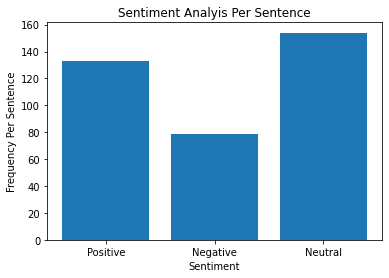

In [94]:
text3 = open('3.txt').read()
sent_tokenize(text3)
textList = sent_tokenize(text3)
lookAtParagraph(textList)

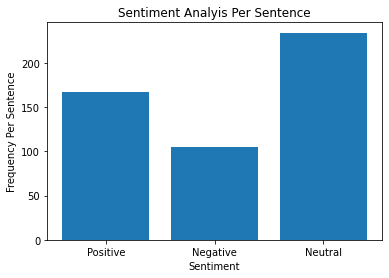

In [95]:
text = open('4.txt').read()
sent_tokenize(text2)
textList = sent_tokenize(text2)
lookAtParagraph(textList)

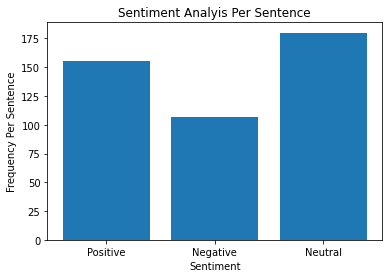

In [96]:
text2 = open('5.txt').read()
sent_tokenize(text2)
textList = sent_tokenize(text2)
lookAtParagraph(textList)

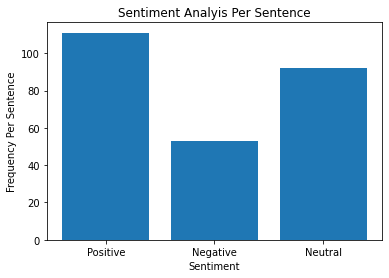

In [97]:
text2 = open('6.txt').read()
sent_tokenize(text2)
textList = sent_tokenize(text2)
lookAtParagraph(textList)

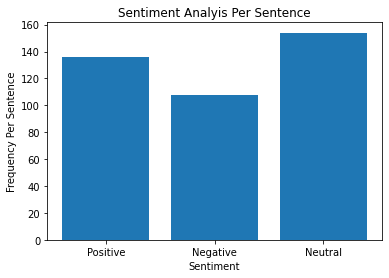

In [98]:
text2 = open('7.txt').read()
sent_tokenize(text2)
textList = sent_tokenize(text2)
lookAtParagraph(textList)

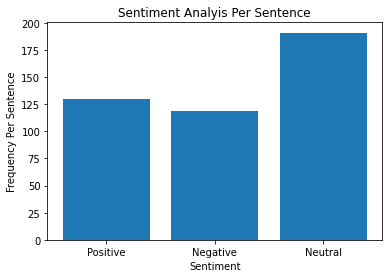

In [99]:
text2 = open('8.txt').read()
sent_tokenize(text2)
textList = sent_tokenize(text2)
lookAtParagraph(textList)

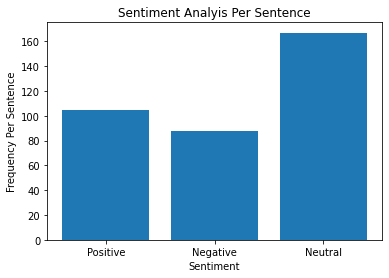

In [100]:
text2 = open('9.txt').read()
sent_tokenize(text2)
textList = sent_tokenize(text2)
lookAtParagraph(textList)

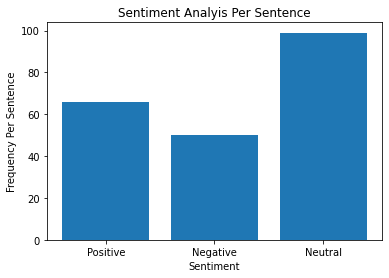

In [101]:
text2 = open('10.txt').read()
sent_tokenize(text2)
textList = sent_tokenize(text2)
lookAtParagraph(textList)

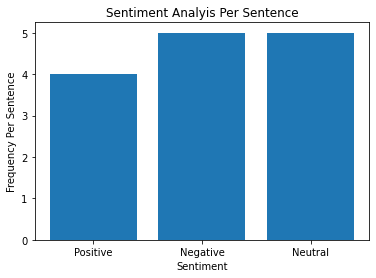

In [102]:
text2 = open('11.txt').read()
sent_tokenize(text2)
textList = sent_tokenize(text2)
lookAtParagraph(textList)

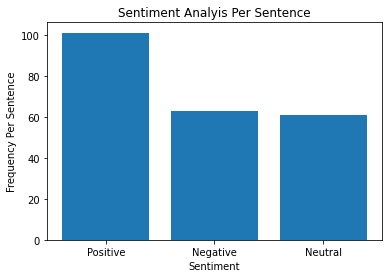

In [103]:
text2 = open('12.txt').read()
sent_tokenize(text2)
textList = sent_tokenize(text2)
lookAtParagraph(textList)

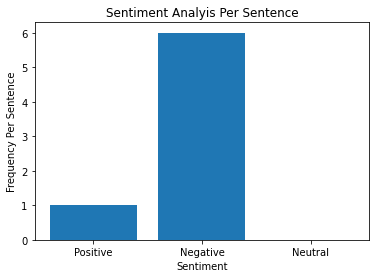

In [104]:
text2 = open('13.txt').read()
sent_tokenize(text2)
textList = sent_tokenize(text2)
lookAtParagraph(textList)

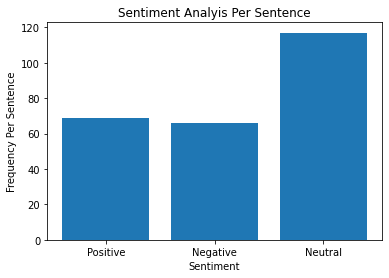

In [105]:
text2 = open('14.txt').read()
sent_tokenize(text2)
textList = sent_tokenize(text2)
lookAtParagraph(textList)

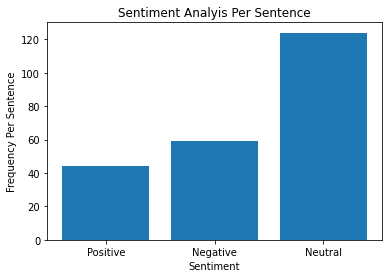

In [106]:
text2 = open('15.txt').read()
sent_tokenize(text2)
textList = sent_tokenize(text2)
lookAtParagraph(textList)

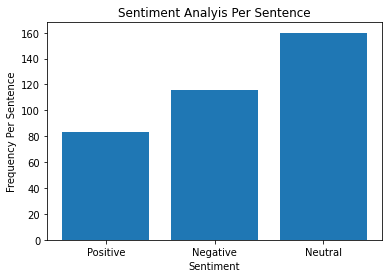

In [107]:
text2 = open('16.txt').read()
sent_tokenize(text2)
textList = sent_tokenize(text2)
lookAtParagraph(textList)

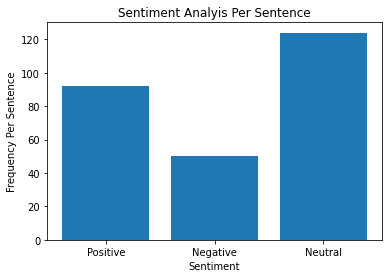

In [108]:
text2 = open('17.txt').read()
sent_tokenize(text2)
textList = sent_tokenize(text2)
lookAtParagraph(textList)

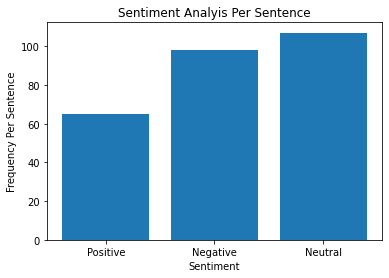

In [109]:
text2 = open('18.txt').read()
sent_tokenize(text2)
textList = sent_tokenize(text2)
lookAtParagraph(textList)

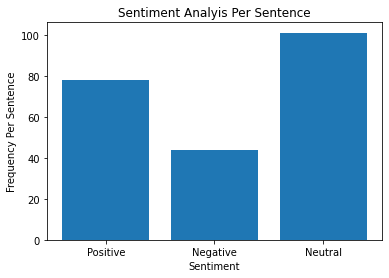

In [110]:
text2 = open('19.txt').read()
sent_tokenize(text2)
textList = sent_tokenize(text2)
lookAtParagraph(textList)

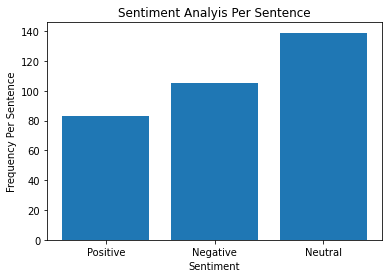

In [111]:
text2 = open('20.txt').read()
sent_tokenize(text2)
textList = sent_tokenize(text2)
lookAtParagraph(textList)

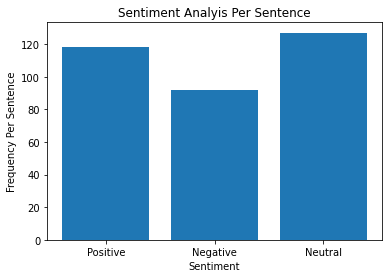

In [112]:
text2 = open('21.txt').read()
sent_tokenize(text2)
textList = sent_tokenize(text2)
lookAtParagraph(textList)

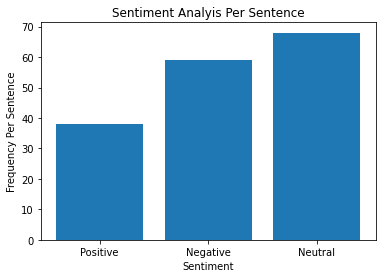

In [113]:
text2 = open('22.txt').read()
sent_tokenize(text2)
textList = sent_tokenize(text2)
lookAtParagraph(textList)